## 🛠 Exercises

1. Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/). 
 * What are the key terms? e.g. explain convolution in your own words, pooling in your own words

2. Play around with the "understanding hyperparameters" section in the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for 10-minutes.
  * What is the kernel size?
  * What is the stride? 
  * How could you adjust each of these in TensorFlow code?

3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

### Number 1

1. **Pool layer** is  downsamples or shrink input image with take value maximal `max pool` or by average valur `average pool`  <br>
2. **Convolution layer** is feature extraction perform aritmath dot prodcut with kernel.


### Number 2

1. **Kernel size** is refered to filter size how many slide image data to extract feature in image
2. **Stride** is how many pixel kernel shifted ongoing in convlution layer
3. `tf.keras.layers.conv2D(filter=2,
kernel_size=2)`  

### Number 3

In [1]:
import tensorflow as tf 
import numpy as np
import random
import matplotlib.pyplot as plt

Call Image

In [2]:
!wget https://github.com/ackermanjayjay/food-classification/raw/main/data_untuk_workhsop.zip

--2022-09-03 10:33:15--  https://github.com/ackermanjayjay/food-classification/raw/main/data_untuk_workhsop.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ackermanjayjay/food-classification/main/data_untuk_workhsop.zip [following]
--2022-09-03 10:33:15--  https://raw.githubusercontent.com/ackermanjayjay/food-classification/main/data_untuk_workhsop.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99578617 (95M) [application/zip]
Saving to: ‘data_untuk_workhsop.zip’

data_untuk_workhsop 100%[===================>]  94.96M   396MB/s    in 0.2s    

2022-09-03 10:33:22 (396 MB/s) - ‘data_

In [3]:
!unzip data_untuk_workhsop.zip

Archive:  data_untuk_workhsop.zip
   creating: val/
   creating: val/fried_rice/
  inflating: val/fried_rice/3515250.jpg  
  inflating: val/fried_rice/3521139.jpg  
  inflating: val/fried_rice/3528567.jpg  
  inflating: val/fried_rice/3531198.jpg  
  inflating: val/fried_rice/3542359.jpg  
  inflating: val/fried_rice/3547337.jpg  
  inflating: val/fried_rice/3554481.jpg  
  inflating: val/fried_rice/3555295.jpg  
  inflating: val/fried_rice/3571082.jpg  
  inflating: val/fried_rice/3584356.jpg  
  inflating: val/fried_rice/3586562.jpg  
  inflating: val/fried_rice/3588023.jpg  
  inflating: val/fried_rice/3592807.jpg  
  inflating: val/fried_rice/3603260.jpg  
  inflating: val/fried_rice/3607245.jpg  
  inflating: val/fried_rice/3607348.jpg  
  inflating: val/fried_rice/3618827.jpg  
  inflating: val/fried_rice/3619973.jpg  
  inflating: val/fried_rice/3620105.jpg  
  inflating: val/fried_rice/3623708.jpg  
  inflating: val/fried_rice/3627295.jpg  
  inflating: val/fried_rice/3628597.j

In [4]:
!mkdir image

In [5]:
!mv train image

In [6]:
!mv val image

In [11]:
!mv test image

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("image"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'image'.
There are 2 directories and 0 images in 'image/val'.
There are 0 directories and 100 images in 'image/val/fried_rice'.
There are 0 directories and 100 images in 'image/val/ice_cream'.
There are 2 directories and 0 images in 'image/train'.
There are 0 directories and 800 images in 'image/train/fried_rice'.
There are 0 directories and 800 images in 'image/train/ice_cream'.


## Viz image

In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(f'{random_image}')
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image



['243829.jpg']
Image shape: (512, 382, 3)


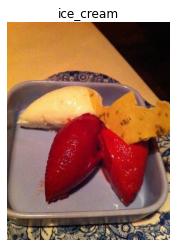

In [12]:
view_random_image('image/test/','ice_cream')

## Split data

In [13]:
train_dir='image/train'
test_dir='image/test'

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [15]:
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             class_mode='binary')
test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [16]:
image,labels=train_data.next()

In [19]:
labels.shape,labels

((32,),
 array([1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.],
       dtype=float32))

In [20]:
# See class or labels image
train_data.class_indices

{'fried_rice': 0, 'ice_cream': 1}

In [21]:
def Viz_datagen_batch(dataImage):
  x , y  = dataImage.next()
  for i in range(2):
    image = x[i]
    label = y[i]
    plt.axis(False)
    # print(label) --> for checking whether it's plotting right ones
    if label == 1.0:
      label = 'ice_cream'
    else:
      label = 'fried_rice'
    plt.title(label)
    plt.imshow(image)
    plt.show()

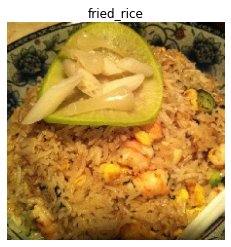

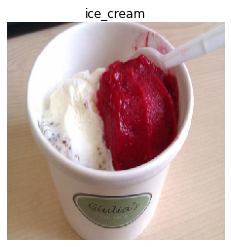

In [22]:
Viz_datagen_batch(train_data)

In [23]:
# Make model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Conv2D,MaxPool2D,Flatten,Dense)
from tensorflow.keras.optimizers import Adam

In [24]:
# Make model simplefield
model_ans =  Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),


    Flatten(),
    Dense(1,activation='sigmoid')
])

In [25]:
model_ans.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 123210)            0         
                                                                 
 dense (Dense)               (None, 1)                 123211    
                                                                 
Total params: 123,491
Trainable params: 123,491
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile model
model_ans.compile(loss='BinaryCrossentropy',
                  optimizer=Adam(),
                  metrics=["accuracy"])

In [27]:
# Fit model
hist_model_ans=model_ans.fit(train_data,
                             epochs=5,
                             steps_per_epoch=len(train_data),
                             validation_data=test_data,
                             validation_steps=len(test_data))

Epoch 1/5
50/50 [==============================] - 21s 165ms/step - loss: 1.5048 - accuracy: 0.6219 - val_loss: 0.7409 - val_accuracy: 0.6600
Epoch 2/5
50/50 [==============================] - 8s 164ms/step - loss: 0.5267 - accuracy: 0.7444 - val_loss: 0.5971 - val_accuracy: 0.7100
Epoch 3/5
50/50 [==============================] - 8s 162ms/step - loss: 0.4439 - accuracy: 0.8012 - val_loss: 0.5321 - val_accuracy: 0.7100
Epoch 4/5
50/50 [==============================] - 8s 162ms/step - loss: 0.3694 - accuracy: 0.8475 - val_loss: 0.5134 - val_accuracy: 0.7450
Epoch 5/5
50/50 [==============================] - 8s 161ms/step - loss: 0.2982 - accuracy: 0.8963 - val_loss: 0.5939 - val_accuracy: 0.7300


## Evalute 

In [28]:
val_datagen=ImageDataGenerator(rescale=1/255.)


In [29]:
val_data=val_datagen.flow_from_directory('image/val',
                                            target_size=(224,224),
                                             class_mode='binary')

Found 200 images belonging to 2 classes.


In [30]:
model_ans.evaluate(val_data)

7/7 [==============================] - 1s 130ms/step - loss: 0.4684 - accuracy: 0.7750


[0.4683877229690552, 0.7749999761581421]

In [31]:
import pandas as pd

In [32]:
pd.DataFrame(hist_model_ans.history)

,loss,accuracy,val_loss,val_accuracy
0,1.504789,0.621875,0.740874,0.660
1,0.526673,0.744375,0.597100,0.710
2,0.443893,0.801250,0.532063,0.710
3,0.369430,0.847500,0.513360,0.745
4,0.298199,0.896250,0.593882,0.730


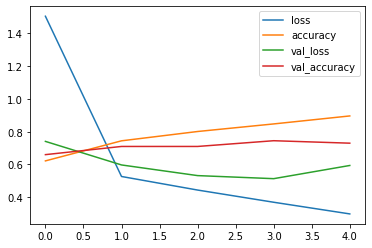

In [33]:
pd.DataFrame(hist_model_ans.history).plot()

In [34]:
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

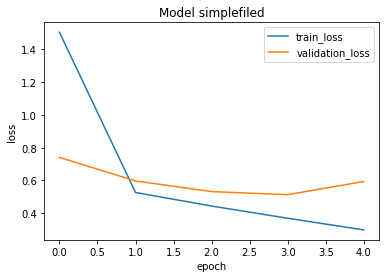

In [35]:
plot_loss(hist_model_ans,'Model simplefiled')

In [36]:
def plot_acc(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()

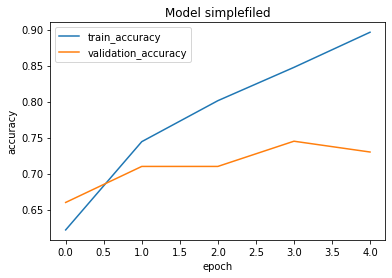

In [37]:
plot_acc(hist_model_ans,'Model simplefiled')

The curves acc and loss seems bit jumpy or overfit

### Try Again with augmented

In [38]:
train_datagen_augmented=ImageDataGenerator(rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
test_datagen_augmented=ImageDataGenerator(rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

In [39]:
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             class_mode='binary')
test_data_augmented=test_datagen_augmented.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [40]:
hist_model_ans_aug=model_ans.fit(train_data_augmented,
                             epochs=5,
                             steps_per_epoch=len(train_data_augmented),
                             validation_data=test_data_augmented,
                             validation_steps=len(test_data_augmented))

Epoch 1/5
50/50 [==============================] - 26s 520ms/step - loss: 98.3546 - accuracy: 0.6300 - val_loss: 8.8310 - val_accuracy: 0.5850
Epoch 2/5
50/50 [==============================] - 24s 486ms/step - loss: 5.4924 - accuracy: 0.6056 - val_loss: 5.3448 - val_accuracy: 0.5550
Epoch 3/5
50/50 [==============================] - 24s 485ms/step - loss: 2.9489 - accuracy: 0.5969 - val_loss: 2.0559 - val_accuracy: 0.5500
Epoch 4/5
50/50 [==============================] - 24s 490ms/step - loss: 1.9809 - accuracy: 0.5850 - val_loss: 1.4349 - val_accuracy: 0.5700
Epoch 5/5
50/50 [==============================] - 25s 505ms/step - loss: 1.7298 - accuracy: 0.5875 - val_loss: 1.0790 - val_accuracy: 0.5350


In [44]:
def plot_loss_acc(history,title):
    plt.figure()
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')

    plt.figure()
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()

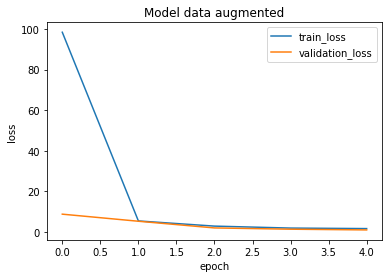

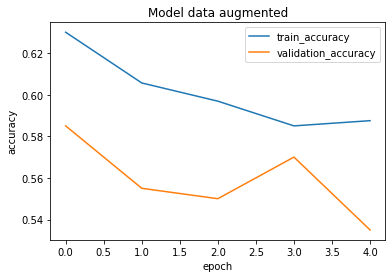

In [46]:
plot_loss_acc(hist_model_ans_aug,'Model data augmented')

Reference https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323

SO the conclusion is data with augmented can make prodduce accuration les than data not augmented.

# Number 4

reference : https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

https://neptune.ai/blog/how-to-choose-a-learning-rate-scheduler

In [47]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [48]:
lr_scheduler=LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

In [76]:
lr_hist_=model_ans.fit(train_data,
                             epochs=5,
                             steps_per_epoch=len(train_data),
                             validation_data=test_data,
                             validation_steps=len(test_data),
                            callbacks = [lr_scheduler]
                       )

Epoch 1/5
50/50 [==============================] - 8s 162ms/step - loss: 0.6756 - accuracy: 0.6506 - val_loss: 0.6836 - val_accuracy: 0.5650 - lr: 1.0000e-04
Epoch 2/5
50/50 [==============================] - 8s 165ms/step - loss: 0.6752 - accuracy: 0.6506 - val_loss: 0.6832 - val_accuracy: 0.5750 - lr: 1.1220e-04
Epoch 3/5
50/50 [==============================] - 9s 174ms/step - loss: 0.6748 - accuracy: 0.6481 - val_loss: 0.6827 - val_accuracy: 0.5800 - lr: 1.2589e-04
Epoch 4/5
50/50 [==============================] - 8s 159ms/step - loss: 0.6743 - accuracy: 0.6388 - val_loss: 0.6822 - val_accuracy: 0.5700 - lr: 1.4125e-04
Epoch 5/5
50/50 [==============================] - 8s 159ms/step - loss: 0.6738 - accuracy: 0.6350 - val_loss: 0.6818 - val_accuracy: 0.5700 - lr: 1.5849e-04


In [87]:
lrs = 1e-4 * (10 ** (np.arange(5)/20))


In [88]:
lrs

array([0.0001    , 0.0001122 , 0.00012589, 0.00014125, 0.00015849])

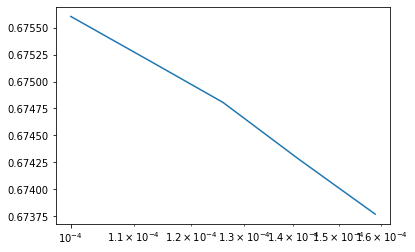

In [89]:
plt.semilogx(lrs,lr_hist_.history["loss"])

In [82]:
model_ans.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 123210)            0         
                                                                 
 dense (Dense)               (None, 1)                 123211    
                                                                 
Total params: 123,491
Trainable params: 123,491
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Function curves learning rate
def curves_LR(lrs,model):
 
  plt.figure(figsize=(10, 7))
  plt.semilogx(lrs, model.history["loss"]) # we want the x-axis (learning rate) to be log scale
  plt.xlabel("Learning Rate")
  plt.ylabel("Loss")
  plt.title("Learning rate vs. loss");

In [91]:
lrs = 1e-4 * (10 ** (np.arange(5)/20))


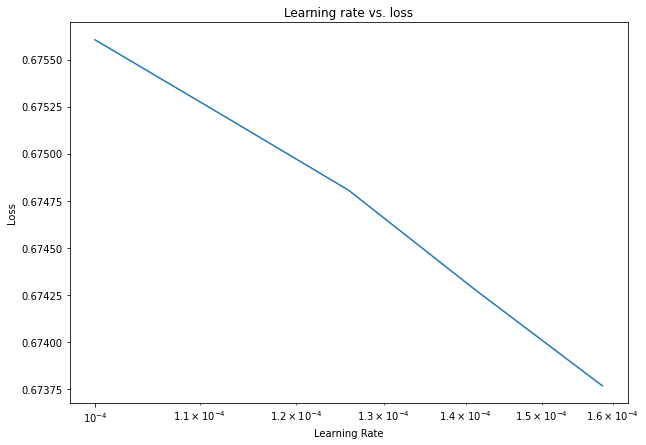

In [92]:
curves_LR(lrs,lr_hist_)

In [94]:
lrs

array([0.0001    , 0.0001122 , 0.00012589, 0.00014125, 0.00015849])

In [104]:
1e-4

0.0001

In [99]:
1.6**-4

0.15258789062499997

In [103]:
1.6*1e-4

0.00016

In [107]:
model_ans.compile(loss='BinaryCrossentropy',
                  optimizer=Adam(learning_rate=0.00014125),
                  metrics=["accuracy"])

In [108]:
lr_get_best=model_ans.fit(train_data,
                             epochs=5,
                             steps_per_epoch=len(train_data),
                             validation_data=test_data,
                             validation_steps=len(test_data),)

Epoch 1/5
50/50 [==============================] - 8s 162ms/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/5
50/50 [==============================] - 8s 159ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/5
50/50 [==============================] - 8s 161ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/5
50/50 [==============================] - 8s 159ms/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 5/5
50/50 [==============================] - 9s 190ms/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.5000


In [111]:
pd.DataFrame(hist_model_ans.history)

,loss,accuracy,val_loss,val_accuracy
0,1.504789,0.621875,0.740874,0.660
1,0.526673,0.744375,0.597100,0.710
2,0.443893,0.801250,0.532063,0.710
3,0.369430,0.847500,0.513360,0.745
4,0.298199,0.896250,0.593882,0.730


In [110]:
pd.DataFrame(lr_get_best.history)

,loss,accuracy,val_loss,val_accuracy
0,0.694668,0.5,0.694634,0.5
1,0.694612,0.5,0.694585,0.5
2,0.694560,0.5,0.694517,0.5
3,0.694502,0.5,0.694479,0.5
4,0.694453,0.5,0.694431,0.5


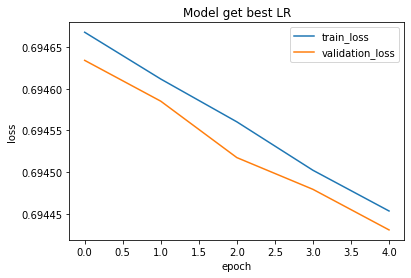

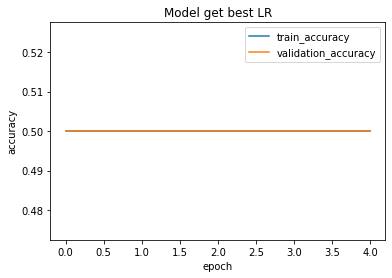

In [109]:
plot_loss_acc(lr_get_best,'Model get best LR')

Concluion default adam Optimizer tensorflow reduce acc, but the lost reduce with validation data